In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import lstsq
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df

,A,B,C,D
0,10.07,2.18,3.0,0.8
1,10.00,2.20,3.0,0.7
2,9.95,2.21,3.0,0.9
3,9.93,2.30,2.5,1.1
4,9.88,2.30,2.5,0.9
...,...,...,...,...
223,8.98,3.00,0.0,1.5
224,8.91,3.10,0.0,1.6
225,8.80,3.20,0.0,1.4
226,8.73,3.10,0.0,1.5


In [4]:
target = df["D"].copy()
df["D"] = target.shift(1,fill_value=target[0])

In [6]:
df

,A,B,C,D
0,10.07,2.18,3.0,0.8
1,10.00,2.20,3.0,0.8
2,9.95,2.21,3.0,0.7
3,9.93,2.30,2.5,0.9
4,9.88,2.30,2.5,1.1
...,...,...,...,...
223,8.98,3.00,0.0,1.3
224,8.91,3.10,0.0,1.5
225,8.80,3.20,0.0,1.6
226,8.73,3.10,0.0,1.4


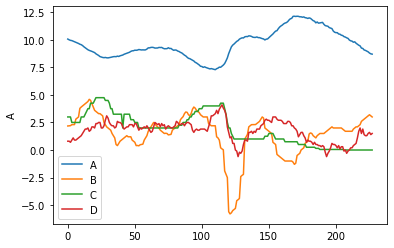

In [7]:
for i,c in enumerate(df.columns):
    sns.lineplot( x=df.index, y=df[c],label=c)

<AxesSubplot:ylabel='D'>

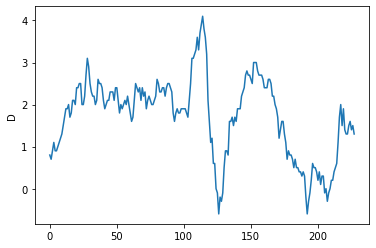

In [8]:
sns.lineplot(x = target.index,y=target)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(df,target,shuffle=False,test_size=20)

In [33]:
x_test

,A,B,C,D
208,10.18,1.7,0.0,-0.3
209,10.13,1.7,0.0,-0.1
210,9.98,1.7,0.0,0.0
211,9.91,1.7,0.0,0.2
212,9.88,1.7,0.0,0.2
213,9.78,1.9,0.0,0.4
214,9.82,2.0,0.0,0.5
215,9.69,2.1,0.0,0.6
216,9.60,2.1,0.0,1.1
217,9.51,2.2,0.0,1.7


In [34]:
model = LinearRegression()

In [35]:
model.fit(x_train,y_train)

LinearRegression()

In [36]:
r2_score(y_test, model.predict(x_test))

0.8193241742784102